In [1]:
import scanpy as sc
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns
import os 

In [2]:
maindir='figures'
answer=os.path.isdir(maindir)
if answer==True:
    pass
else:
    os.mkdir(maindir)

In [3]:
adata=sc.read_h5ad('HVG_basic_transform_spatial_liver_data.h5ad')


In [4]:
adata.var['mt']=adata.var_names.str.startswith('mt-')
sc.pp.calculate_qc_metrics(adata,qc_vars=['mt'],percent_top=None,log1p=False,inplace=True)

/Users/agrawal/miniconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


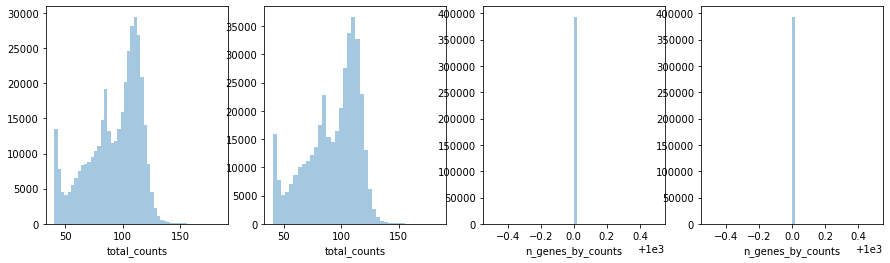

In [5]:
fig, axs = plt.subplots(1, 4, figsize=(15, 4))
sns.distplot(adata.obs["total_counts"], kde=False, ax=axs[0])
sns.distplot(adata.obs["total_counts"][adata.obs["total_counts"] < 10000], kde=False, bins=40, ax=axs[1])
sns.distplot(adata.obs["n_genes_by_counts"], kde=False, bins=60, ax=axs[2])
sns.distplot(adata.obs["n_genes_by_counts"][adata.obs["n_genes_by_counts"] < 4000], kde=False, bins=60, ax=axs[3])
fig.savefig('figures/total_counts_and_n_genes_by_counts.png')

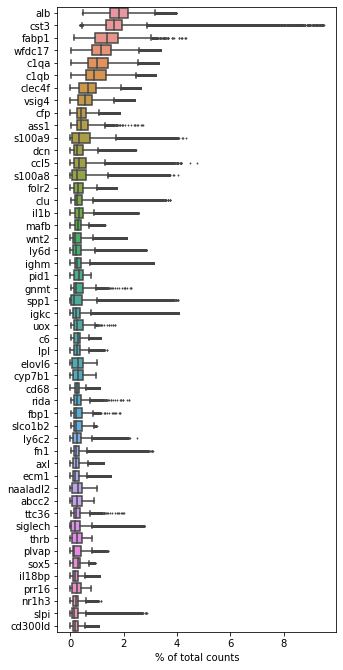

In [6]:
sc.pl.highest_expr_genes(adata,n_top=50,show=True,save='.png')


In [7]:
adata = adata[adata.obs["pct_counts_mt"] < 20]
print(f"#cells after MT filter: {adata.n_obs}")

#cells after MT filter: 393286


In [8]:
sc.pp.pca(adata)
sc.pp.neighbors(adata)
sc.tl.umap(adata)
#sc.tl.louvain(adata,resolution=1.0)
sc.tl.leiden(adata,resolution=1.0)

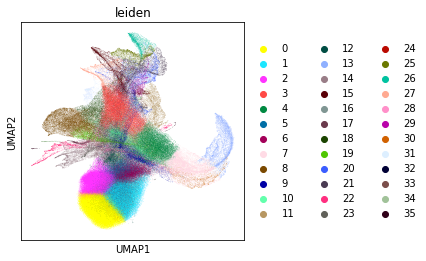

In [9]:
plt.rcParams["figure.figsize"] = (4, 4)
#sc.pl.umap(adata, color=["leiden","total_counts",  "n_genes_by_counts"], wspace=0.4,show=True, save='1.png')

sc.pl.umap(adata, color=["leiden"], wspace=0.4,show=True, save='leiden.png')

/Users/agrawal/miniconda3/lib/python3.9/site-packages/scanpy/tools/_rank_genes_groups.py:394: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  self.stats[group_name, 'names'] = self.var_names[global_indices]
/Users/agrawal/miniconda3/lib/python3.9/site-packages/scanpy/tools/_rank_genes_groups.py:396: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  self.stats[group_name, 'scores'] = scores[global_indices]
/Users/agrawal/miniconda3/lib/python3.9/site-packages/scanpy/tools/_rank_genes_groups.py:399: PerformanceWarning: DataFrame is hi

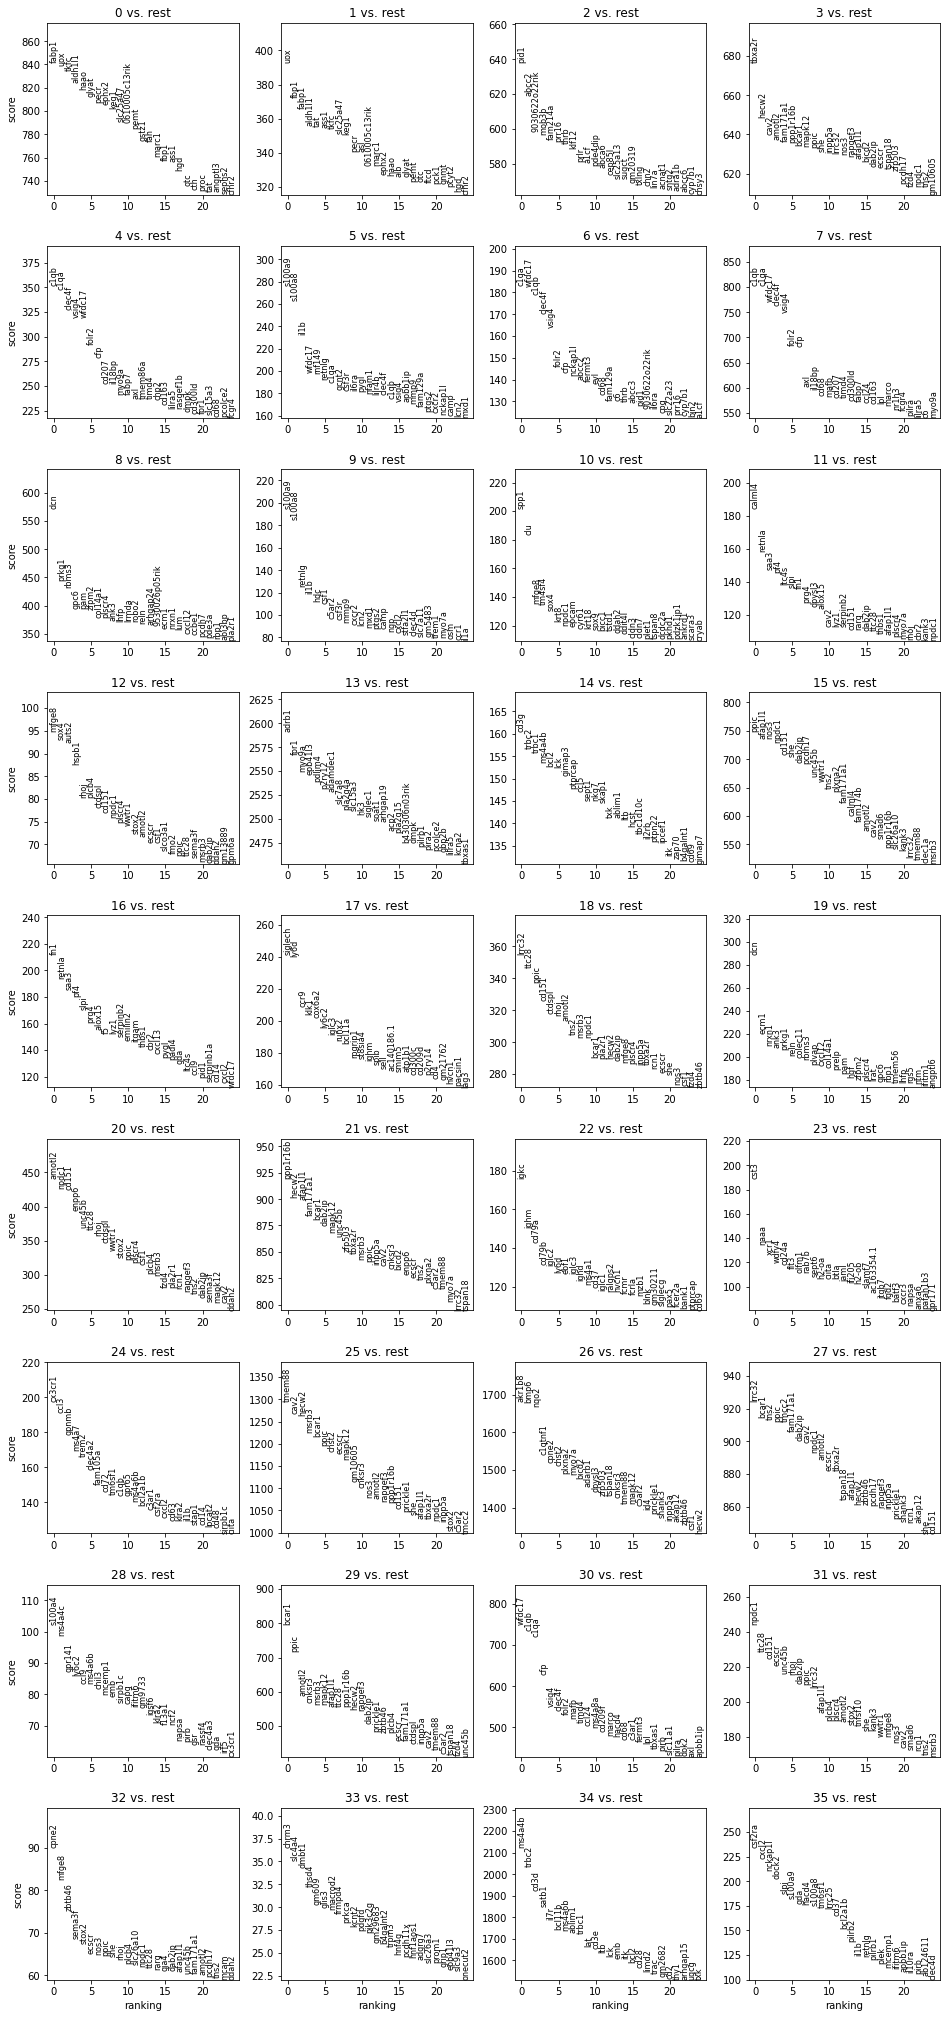

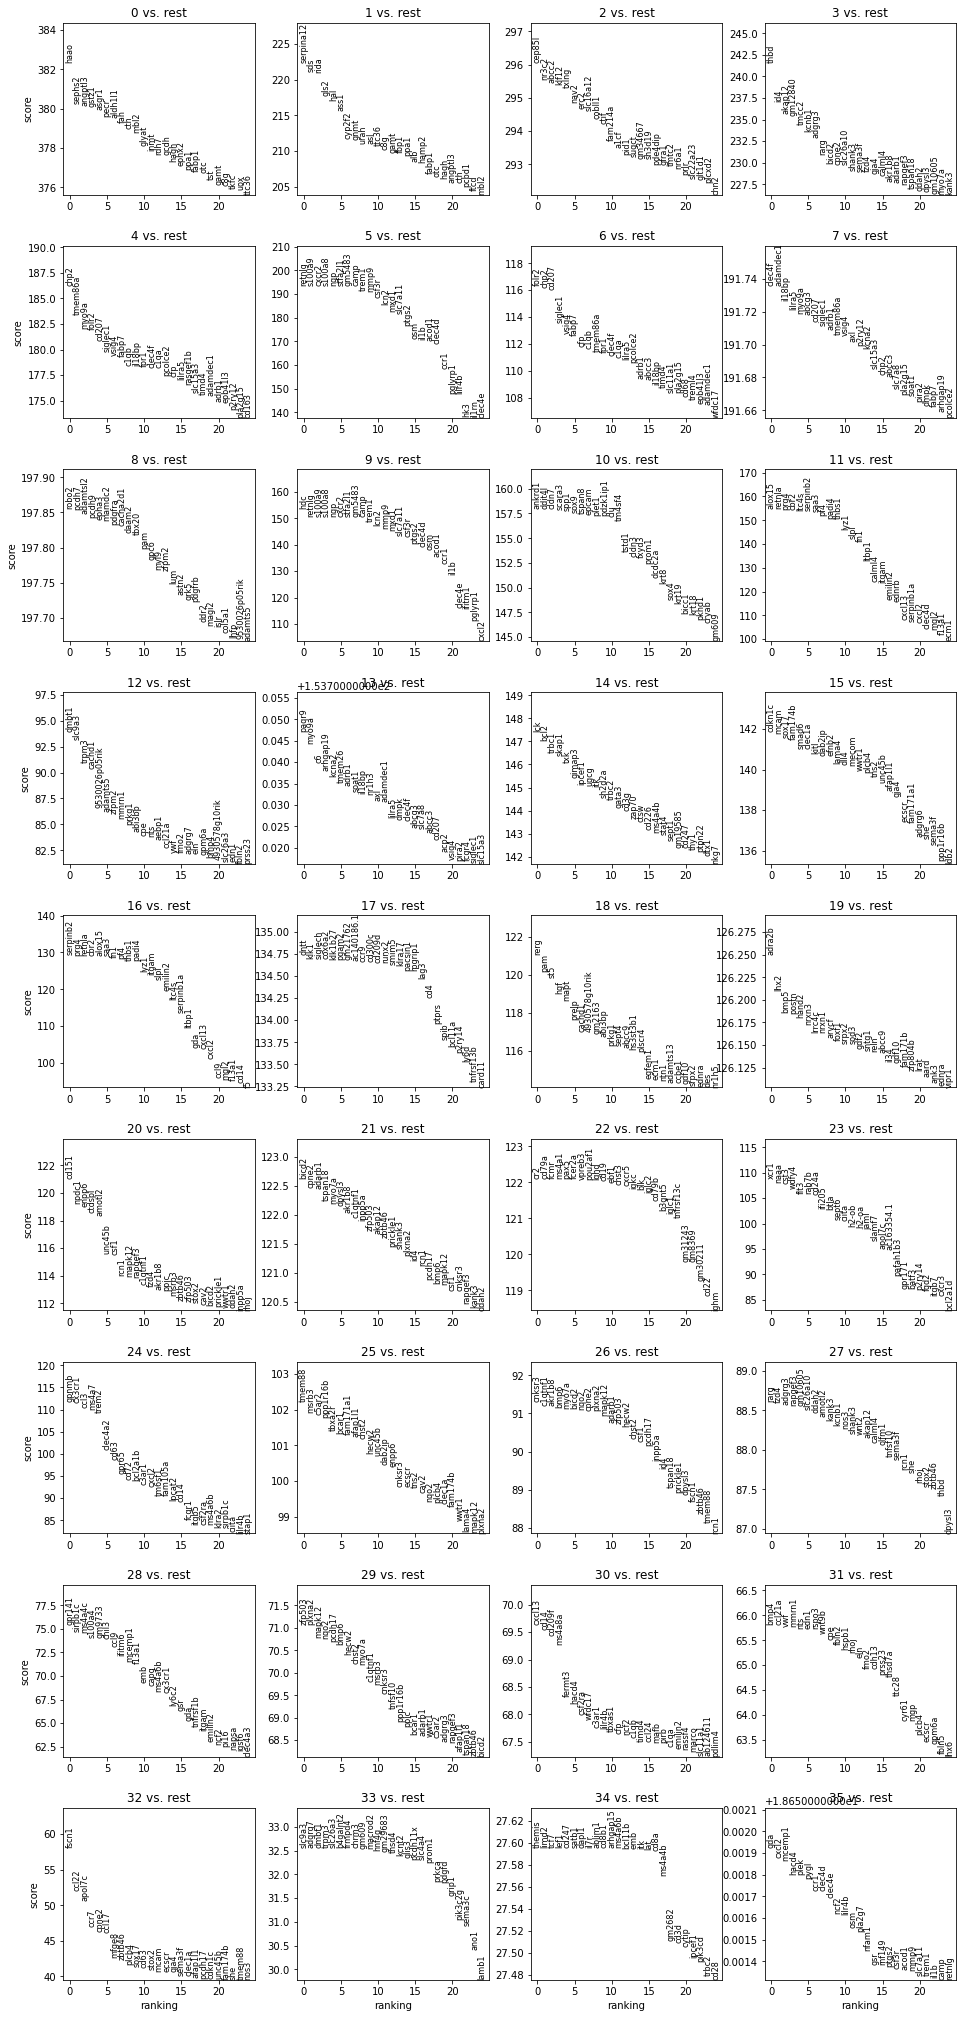

/Users/agrawal/miniconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


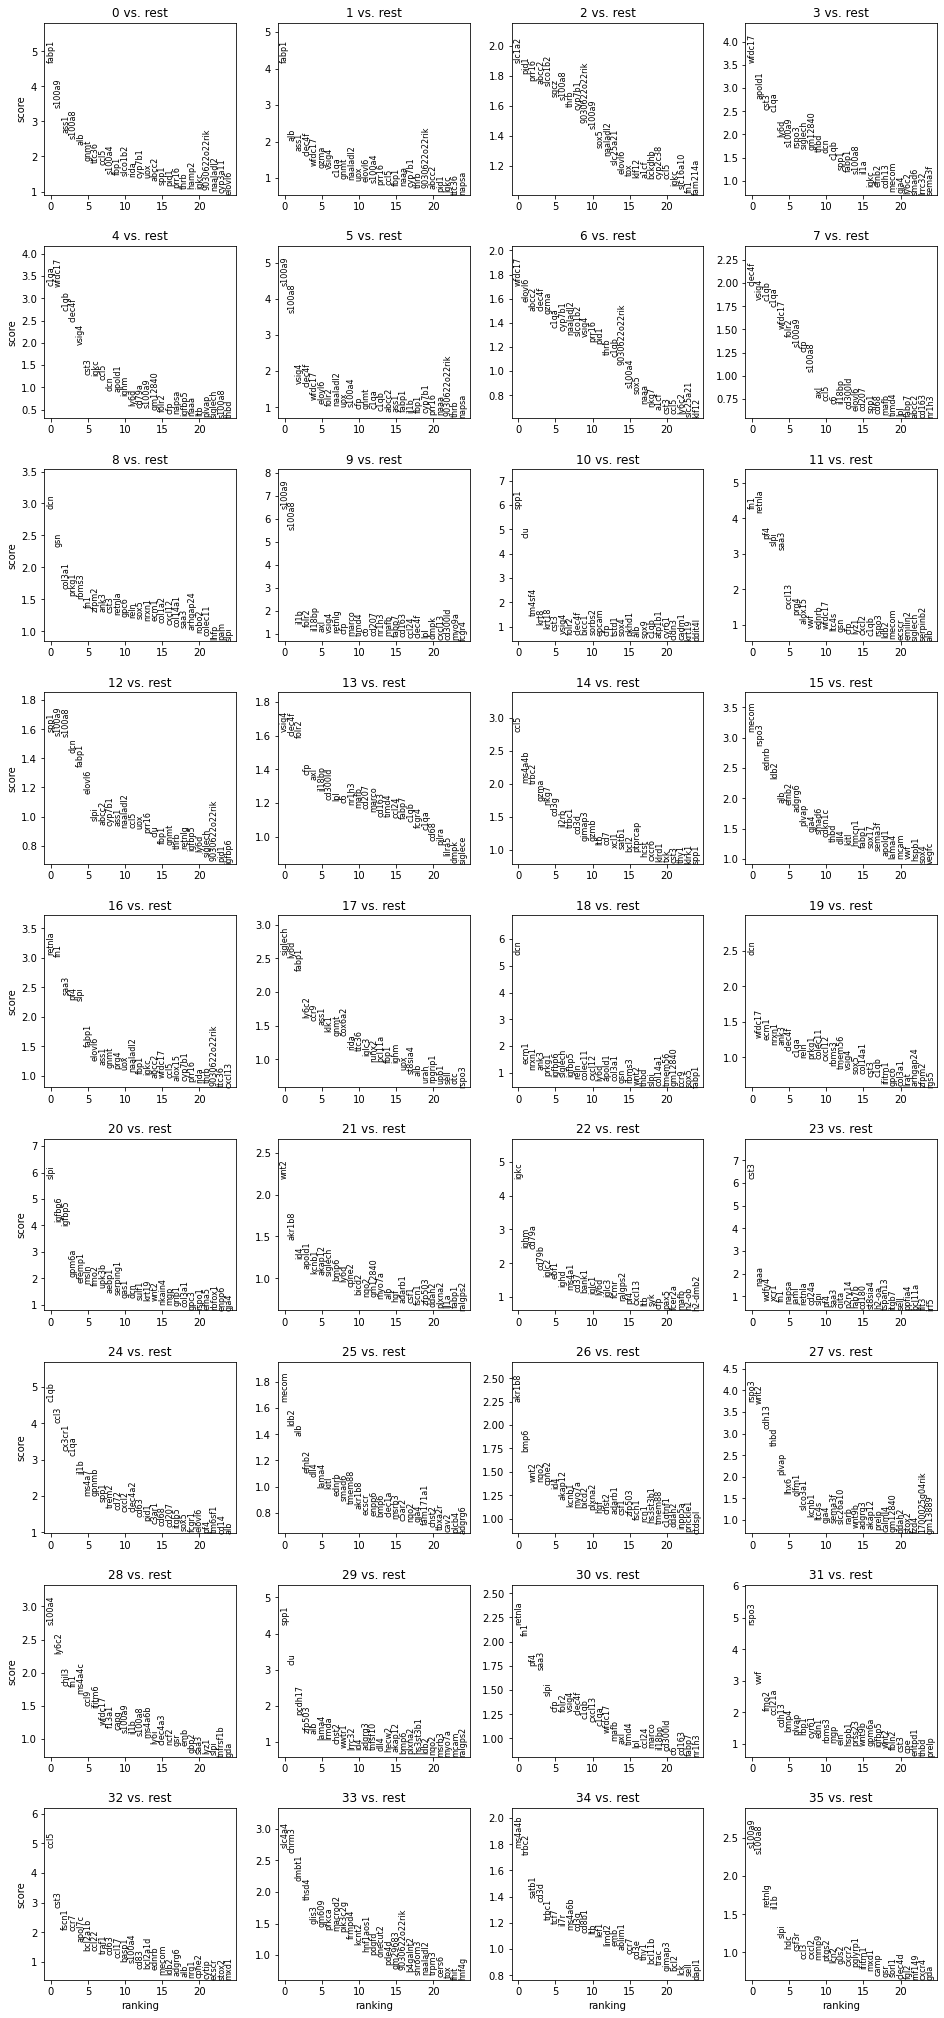

In [10]:
sc.tl.rank_genes_groups(adata, 'leiden', method='t-test')
sc.pl.rank_genes_groups(adata, n_genes=25, sharey=False, show=True, save='_t-test.png')

sc.tl.rank_genes_groups(adata, 'leiden', method='wilcoxon')
sc.pl.rank_genes_groups(adata, n_genes=25, sharey=False,show=True, save='_wilcoxon.png')

sc.tl.rank_genes_groups(adata, 'leiden', method='logreg')
sc.pl.rank_genes_groups(adata, n_genes=25, sharey=False,show=True, save='_logreg.png')

/Users/agrawal/miniconda3/lib/python3.9/site-packages/pandas/core/arrays/categorical.py:2630: FutureWarning: The `inplace` parameter in pandas.Categorical.rename_categories is deprecated and will be removed in a future version. Removing unused categories will always return a new Categorical object.
  res = method(*args, **kwargs)


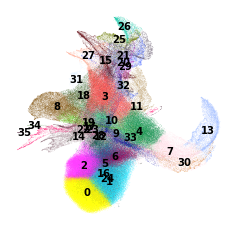

In [11]:
plt.rcParams["figure.figsize"] = (4, 4)
new_cluster_names = ['0','1','2','3','4','5','6','7','8','9','10','11','12','13','14','15','16','17','18','19','20',
                     '21','22','23','24','25','26','27','28','29','30','31','32','33','34','35']
adata.rename_categories('leiden', new_cluster_names)
sc.pl.umap(adata, color='leiden',legend_loc='on data', title='', frameon=False,show=True, save='new_leiden2.png')

In [12]:
adata.obs.leiden.to_csv('figures/leiden_output.dat',header=True)

In [17]:
adata

AnnData object with n_obs × n_vars = 393286 × 1000
    obs: 'uniform_density', 'rna_count_based_density', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'leiden'
    var: 'n_cells', 'is_training', 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'mt', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts'
    uns: 'hvg', 'overlap_genes', 'training_genes', 'pca', 'neighbors', 'umap', 'leiden', 'leiden_colors', 'rank_genes_groups'
    obsm: 'X_pca', 'X_umap'
    varm: 'PCs'
    obsp: 'distances', 'connectivities'

In [18]:
adata.uns['rank_genes_groups']

{'params': {'groupby': 'leiden',
  'reference': 'rest',
  'method': 'logreg',
  'use_raw': False,
  'layer': None,
  'corr_method': 'benjamini-hochberg'},
 'names': rec.array([('fabp1', 'fabp1', 'slc1a2', 'wfdc17', 'c1qa', 's100a9', 'wfdc17', 'clec4f', 'dcn', 's100a9', 'spp1', 'fn1', 'spp1', 'vsig4', 'ccl5', 'mecom', 'retnla', 'siglech', 'dcn', 'dcn', 'slpi', 'wnt2', 'igkc', 'cst3', 'c1qb', 'mecom', 'akr1b8', 'rspo3', 's100a4', 'spp1', 'retnla', 'rspo3', 'ccl5', 'slc4a4', 'ms4a4b', 's100a9'),
            ('s100a9', 'alb', 'pid1', 'apold1', 'wfdc17', 's100a8', 'elovl6', 'vsig4', 'gsn', 's100a8', 'clu', 'retnla', 's100a9', 'clec4f', 'ms4a4b', 'rspo3', 'fn1', 'ly6d', 'ecm1', 'wfdc17', 'igfbp6', 'akr1b8', 'ighm', 'naaa', 'ccl3', 'ldb2', 'bmp6', 'wnt2', 'ly6c2', 'clu', 'fn1', 'vwf', 'cst3', 'chrm3', 'trbc2', 's100a8'),
            ('ass1', 'ass1', 'prr16', 'cst3', 'c1qb', 'vsig4', 'abcc2', 'c1qb', 'col3a1', 'il1b', 'tm4sf4', 'pf4', 's100a8', 'folr2', 'trbc2', 'ednrb', 'saa3', 'fabp1', 'nrxn

In [25]:
# plot spatial clusters on tangram clusters 
dataFolder='input_vizgen_liver/data/'
cluster= pd.read_csv(dataFolder+'sct_leiden_cluster_res100.dat',sep=',',index_col=0,header=0)
cluster=cluster.to_numpy()

ctname=pd.read_csv(dataFolder+'NameOfCT_sct_res100.dat',sep='\t',index_col=0,header=None)
ctname=ctname.to_numpy()
new_cluster_names=ctname[:,0]
adata.obs['knownClusters'] = cluster.astype(str)


In [28]:
#len(np.unique(cluster))
print(len(new_cluster_names))

33


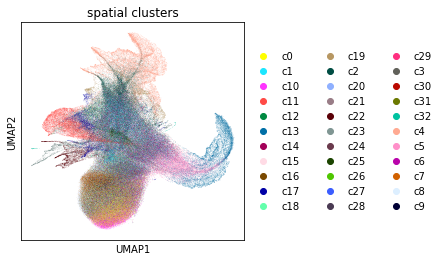

In [30]:
adata.obs['knownClusters']=  adata.obs['knownClusters'].astype('category')
adata.obs['knownClusters'] = adata.obs['knownClusters'].cat.rename_categories(new_cluster_names)

sc.pl.umap(adata, color="knownClusters",title='spatial clusters',show=True,save='_spatial_known_clusters.png')